# Load From File Example
## PrepGsea Package


----------------------

Author: Mikayla Webster (13webstermj@ucsd.edu)

Date: 14th May, 2018

----------------------

<a id='toc'></a>
## Table of Contents
1. [Background](#background)
2. [Import packages](#import)
3. [Reload Previous Analysis](#reload)
6. [Filter Meta and Expression Files](#filter)
8. [Visualization Functions](#vis)

## Background
<a id='background'></a>

The gene set enrichment analysis workflow provides an interactive interface to the gseapy tools.

This notebook shows you how to load a previosuly completed GSEA analysis back into a notebook without having to re-call GSEA. 

## Import Packages
<a id='import'></a>

In [1]:
# uncomment if you have not pip-installed network_bio_toolkit

#import sys
#code_path = '../../network_bio_toolkit'
#sys.path.append(code_path)
#import PrepGsea
#reload(PrepGsea)

from network_bio_toolkit import PrepGsea
reload(PrepGsea)

<module 'network_bio_toolkit.PrepGsea' from 'C:\Users\m1web\Anaconda2\lib\site-packages\network_bio_toolkit\PrepGsea.pyc'>

## Reload Previous Analysis
<a id='reload'></a>

In [2]:
gsea_prepper = PrepGsea.PrepGsea(gmt_file = '../../gseapy_databases/h.all.v6.1.symbols.gmt', # provided
                        expression_file = '../../gseapy_databases/RNA_cpm_all_samples.tsv', # need to supply your own expression file
                        meta_file = '../../gseapy_databases/dHEP_metadata.csv', # provided
                        output_dir = '../../gsea_output') # There can sometimes be errors if you use an existing folder path for gsea_output

In [3]:
# these are the file names that PrepGsea writes to be default
filename_gsea_output = gsea_prepper.output_dir + '/gseapy.gsea.gene_set.report.csv'
filename_anal_info = gsea_prepper.output_dir + '/extra_gsea_info.txt'

# load those files into this analysis
gsea_prepper.load_gsea_from_file(filename_gsea_output, filename_anal_info)

## Filter Meta and Expression Files
<a id='filter'></a>

In [4]:
# need to run this if you want to run plot_individual_pathway_heatmap()
gsea_prepper.filter_metafile()

Filtering metafile by the following classes and controls:

class name: Tissue
Tissue value 1: Liver
Tissue value 2: liver_tumor

controls: 
mouse genotype: Alb-Cre;IL-17RA-flox/flox
short_genotype: AlbCre_IL17RA_floxflox
Model: DEN 
Treatment: DEN_HFD_alcohol

Please confirm that all the information above is correct.



,Sample_name,Sample_Name2,mouse genotype,short_genotype,Model,Treatment,Tissue
0,dHEP_518_A_NT,dHEP-518-A-NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
1,dHEP_520_A_NT,dHEP-520-A-NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
2,dHEP_549_A_NT,dHEP-549-A-NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
3,dHEP_550_A_NT,dHEP-550-A-NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
4,dHEP_518_A_T1,dHEP-518-A-T1,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
5,dHEP_520_A_T,dHEP-520-A-T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
6,dHEP_549_A_T,dHEP-549-A-T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
7,dHEP_550_A_T,dHEP-550-A-T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor


In [5]:
# need to run this if you want to run plot_individual_pathway_heatmap()
gsea_prepper.filter_expression_file()

Expression file before filtering: (22187, 30)


,dHEP_549_A_T,dHEP_520_A_NT,dHEP_178_NI,F_F_167_NC_T,dHEP_550_A_NT,F_F_158_NC_NT,dHEP_549_A_NT,dHEP_520_A_T,F_F_169_NC_T,F_F_503_A_T1,...,dHEP_164_NC_NT,F_F_523_A_T1,F_F_184_NI,dHEP_155_NC_NT,F_F_159_NC_NT,dHEP_165_NC_T,dHEP_155_NC_T,F_F_168_NC_T,F_F_595_A_T,F_F_581_A_NT
Gnai3,121.519560,89.035979,94.557437,113.223446,98.230254,111.136707,97.474351,132.836892,109.328840,114.096305,...,113.769663,132.891660,109.728700,106.096154,103.304758,192.471416,153.176144,183.460817,152.620839,108.366033
NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cdc45,1.958903,1.673062,1.196930,2.630385,1.766455,1.086912,0.898758,2.300206,1.993288,1.984284,...,2.222064,1.612585,0.693510,1.687041,1.777031,1.688346,4.976438,4.123100,1.531535,1.943865
NaN,0.067548,0.072742,0.108812,0.233812,0.153605,0.000000,0.000000,0.287526,0.241611,0.631363,...,0.000000,0.293197,0.077057,0.000000,0.000000,0.135068,0.238221,0.056104,0.000000,0.065916
Apoh,1484.443494,1381.221548,1823.576617,1170.813440,1223.001220,1827.370055,1292.413480,886.585618,1267.127294,1078.638506,...,1497.374679,1145.375110,1898.753434,1567.636285,1727.570680,1453.395562,627.533836,1003.480178,1232.619699,1349.697628



Filtered meta file: (8, 7)


,Sample_name,Sample_Name2,mouse genotype,short_genotype,Model,Treatment,Tissue
0,dHEP_518_A_NT,dHEP-518-A-NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
1,dHEP_520_A_NT,dHEP-520-A-NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
2,dHEP_549_A_NT,dHEP-549-A-NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
3,dHEP_550_A_NT,dHEP-550-A-NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
4,dHEP_518_A_T1,dHEP-518-A-T1,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
5,dHEP_520_A_T,dHEP-520-A-T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
6,dHEP_549_A_T,dHEP-549-A-T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
7,dHEP_550_A_T,dHEP-550-A-T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor



Filtered expression file: (22187, 9)


,Name,dHEP_518_A_NT,dHEP_520_A_NT,dHEP_549_A_NT,dHEP_550_A_NT,dHEP_518_A_T1,dHEP_520_A_T,dHEP_549_A_T,dHEP_550_A_T
0,GNAI3,89.013791,89.035979,97.474351,98.230254,109.496950,132.836892,121.519560,230.577450
1,NAN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CDC45,2.455007,1.673062,0.898758,1.766455,1.489754,2.300206,1.958903,6.451114
3,NAN,0.000000,0.072742,0.000000,0.153605,0.165528,0.287526,0.067548,0.199519
4,APOH,1312.319871,1381.221548,1292.413480,1223.001220,1304.197234,886.585618,1484.443494,1383.930242


## Visualization Functions
<a id='vis'></a>

Filtering metafile by the following classes and controls:

class name: Tissue
Tissue value 1: Liver
Tissue value 2: liver_tumor

controls: 
mouse genotype: Alb-Cre;IL-17RA-flox/flox
short_genotype: AlbCre_IL17RA_floxflox
Model: DEN 
Treatment: DEN_HFD_alcohol

Please confirm that all the information above is correct.



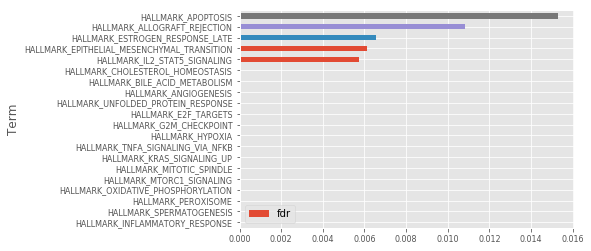

In [6]:
gsea_prepper.plot_gsea(style_content = 'ggplot', top = 20, y = 'fdr', x = 'Term', fontsize = 8)

Filtering metafile by the following classes and controls:

class name: Tissue
Tissue value 1: Liver
Tissue value 2: liver_tumor

controls: 
mouse genotype: Alb-Cre;IL-17RA-flox/flox
short_genotype: AlbCre_IL17RA_floxflox
Model: DEN 
Treatment: DEN_HFD_alcohol

Please confirm that all the information above is correct.



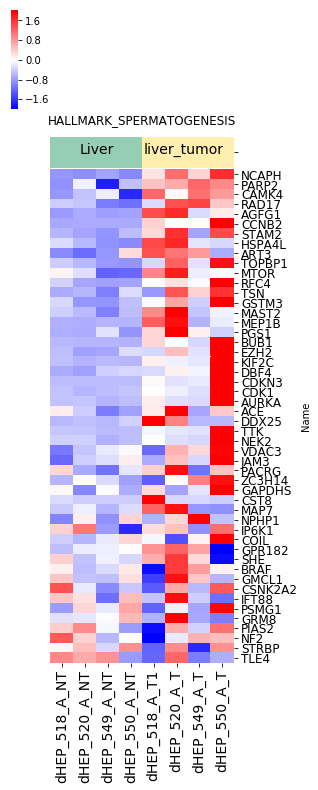

In [7]:
gsea_prepper.plot_individual_pathway_heatmap('HALLMARK_SPERMATOGENESIS')